<a href="https://colab.research.google.com/github/ASO1801038/AI_teach2020/blob/master/2020AI030A_family_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

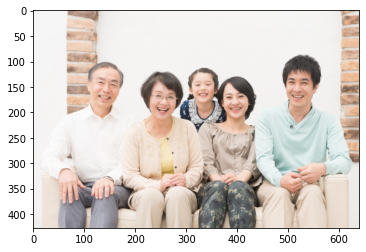

In [18]:
import matplotlib.pyplot as plt
import cv2
import urllib.request as req
import urllib.request as req

#DL元のURL
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
savefile = "family.png"
req.urlretrieve(url, savefile)
img = cv2.imread(savefile)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

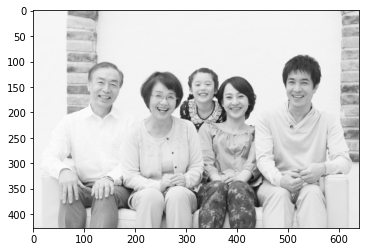

In [19]:
#グレースケール
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml"
cascade_file = "cascade_file.xml"
req.urlretrieve(url, cascade_file)
cascade = cv2.CascadeClassifier(cascade_file)

In [21]:
face_list = cascade.detectMultiScale(img_gray, minSize=(50, 50))
if len(face_list) == 0:
  print("検出数ゼロ")
else:
  print("検出数：",len(face_list),"件")

検出数： 5 件


顔座標：x = 487 y =  117 横w =  66 縦h =  66
顔座標：x = 112 y =  118 横w =  67 縦h =  67
顔座標：x = 304 y =  122 横w =  58 縦h =  58
顔座標：x = 226 y =  146 横w =  62 縦h =  62
顔座標：x = 367 y =  148 横w =  59 縦h =  59


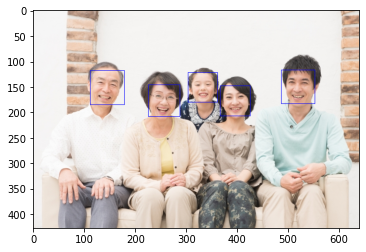

In [22]:
for (x, y, w, h) in face_list:
  print("顔座標：x =", x, "y = ", y, "横w = ", w, "縦h = ", h)
  #矩形の色
  blue = (255, 0, 0)
  #元画像に矩形追加（対象、矩形の左上座標、右下座標、色（青）、線の太さ）
  cv2.rectangle(img, (x, y), (x + w, y + h), blue, thickness=1)

#顔データ保存
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
def mosaic(img, rect, size):
  (x1, y1, x2, y2) = rect
  w = x2 - x1
  h = y2 - y1
  i_rect = img[y1:y2, x1:x2]
  i_small = cv2.resize(i_rect, (size, size))
  i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2

5 件見つかりました。


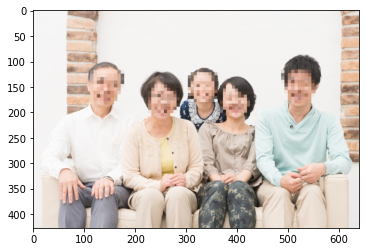

In [24]:
cascade = cv2.CascadeClassifier(cascade_file)
url = "https://raw.githubusercontent.com/masatokg/sample_photo/master/familyface001.PNG"
family_file = "family.png"
req.urlretrieve(url, family_file)
img_family = cv2.imread(family_file)
img_family_gray = cv2.cvtColor(img_family, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_family_gray, minSize=(50, 50))
if len(face_list) == 0:
  print("顔が見つかりません。")
else:
  print(len(face_list), "件見つかりました。")
for(x, y, w, h) in face_list:
  img_family = mosaic(img_family, (x, y, x + w, y + h), 10)

cv2.imwrite("family-mosaic.png", img_family)
plt.imshow(cv2.cvtColor(img_family, cv2.COLOR_BGR2RGB))
plt.show()